In [1]:
from prep_image import prep_im
from MyModel import *

In [2]:
feature_data = '..' + os.sep + "feature_data.csv"
meta_data = '..' +  os.sep + 'metadata_withmasks.csv'

image_folder = '..' +  os.sep + 'test_images' + os.sep
mask_folder = '..' +  os.sep + 'test_images_masks' + os.sep

In [3]:
# Extract image ids and labels
df = pd.read_csv(meta_data)
df_features = pd.read_csv(feature_data)

# Remove data for images without masks
df_mask = df['mask'] == 1
df = df.loc[df_mask]

# Extract labels for images
labels = list(df['diagnostic'])

In [4]:
feature_names = ['mean_assymmetry', 'best_asymmetry', 'worst_asymmetry', 'red_var', 'green_var', \
     'blue_var', 'hue_var', 'sat_var', 'val_var', 'dom_hue', 'dom_sat', 'dom_val', \
     'compactness', 'area', 'perimeter', 'convexity', 'F1', 'F2', 'F3', 'F10', 'F11', 'F12']

In [5]:
X_train , X_test, y_train, y_test = train_test_split(df_features[feature_names], labels, test_size = 0.20, random_state = 42)

In [6]:
feature_selector = feature_selector(X_train, y_train, 10)
scores = feature_scores(feature_selector)

In [16]:
scores_sorted = np.sort(scores)[::-1]
threshold = scores_sorted[10]

In [17]:
def plot_feature_scores(scores, X_train):
    # Get no. of features
    features = len(scores)

    # Visualize feature scores
    plt.bar(np.arange(0,features), scores, width=.2)
    plt.xticks(np.arange(0,features), list(X_train.columns), rotation='vertical')
    plt.axhline(y=threshold, color='r')
    plt.show()

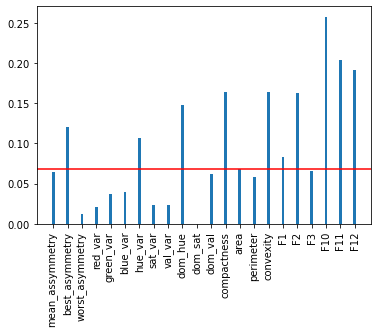

In [19]:
plot_feature_scores(scores, X_train)